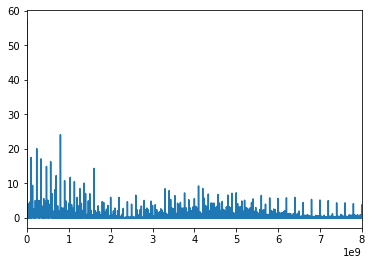

[       0.           499999.75000012   999999.50000025 ...
 -1499999.25000037  -999999.50000025  -499999.75000012]
[5.72824355e+01-0.j         4.54066227e-02-0.00830187j
 3.69877387e-02-0.00575032j ... 3.72008021e-02-0.0007383j
 3.69877387e-02+0.00575032j 4.54066227e-02+0.00830187j]
2000001


In [32]:
from pandas import *
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq
import numpy as np

# read pwr trace file
#data = read_csv("1R_FS_8u_pwr.csv")
data = read_csv("1R_FS_0p5u_pwr.csv")

# read columns into list
#time = data["time"]
#pwr = data["pwr"]

time = data["/V3/MINUS (Idc=5e-07) X"] #idc=7.5e-06
pwr = data["/V3/MINUS (Idc=5e-07) Y"]

SAMPLE_RATE = 1e12
N = len(pwr)

x = np.array(pwr)

#plt.plot(time, pwr)
#plt.xlim(0.00000004, 0.00000006)

# FFT transfer
yf = fft(x)
xf = fftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.xlim(0, 8e9)

plt.show()

print(xf)
print(yf)

print(N)

# file i/o
with open('xf_file.txt', 'w') as filehandle:
    for listitem in xf:
        filehandle.write('%s\n' % listitem)
        
with open('yf_file.txt', 'w') as filehandle:
    for listitem in yf:
        filehandle.write('%s\n' % listitem)
        
#time_step = 0.000000000001
#time_vec = np.arange(0.00000004, 0.00000005, time_step)